In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [7]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

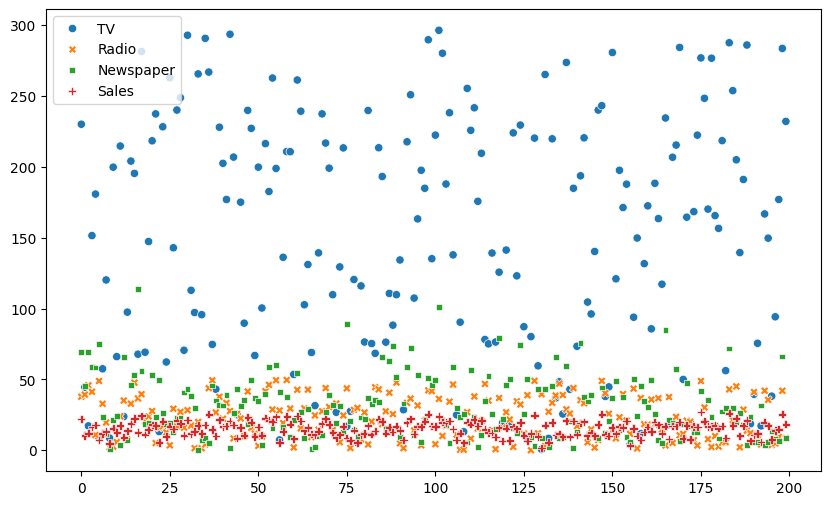

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df)
plt.show()

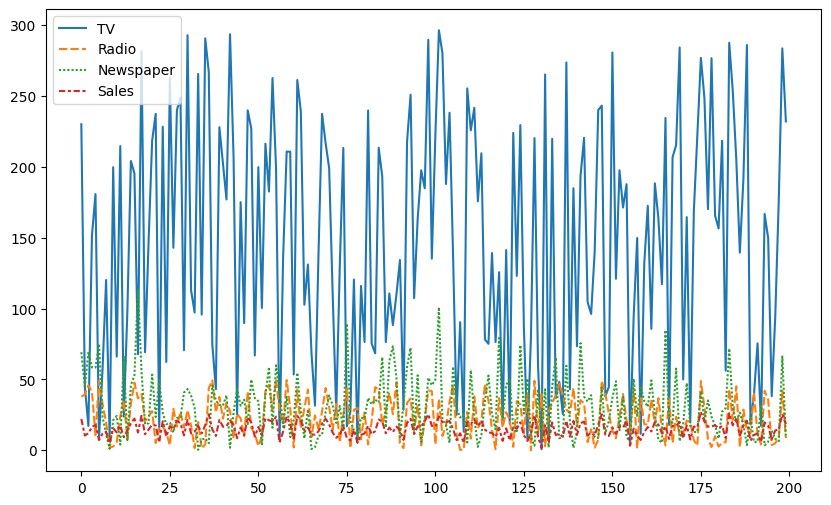

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df)
plt.show()

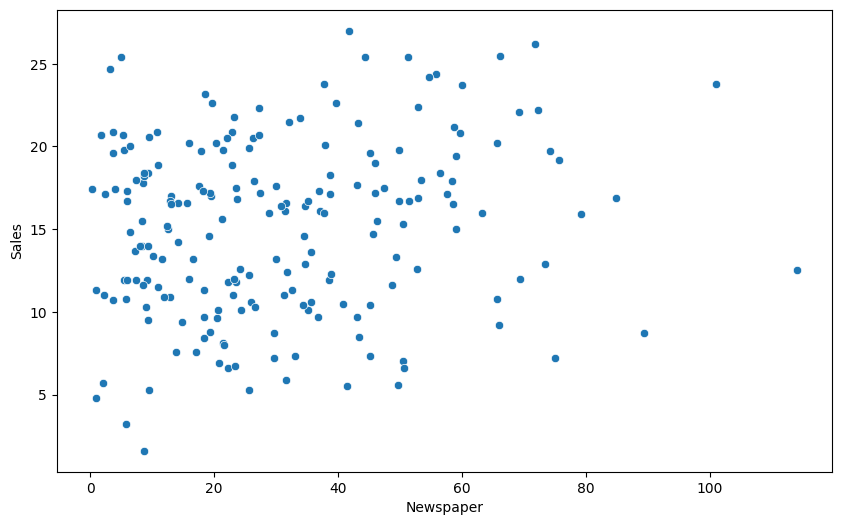

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

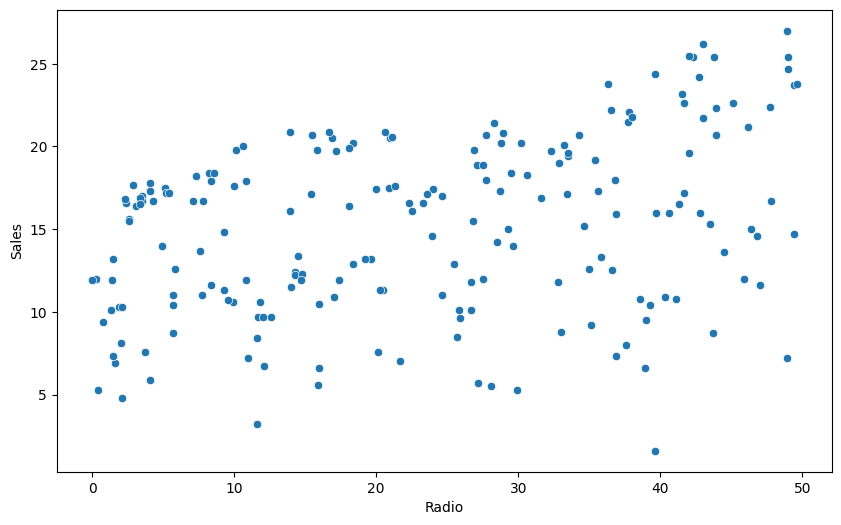

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

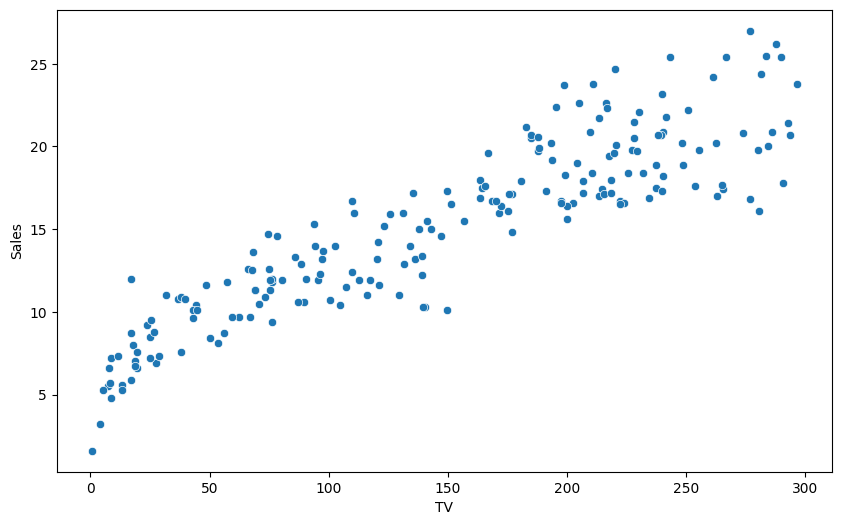

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

In [62]:
columns = ['TV','Radio','Newspaper','Sales']
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [63]:
df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732


In [64]:
df.corrwith(df['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
dtype: float64

In [65]:
X = df['TV']
X

0      0.775786
1      0.148123
2      0.055800
3      0.509976
4      0.609063
         ...   
195    0.126818
196    0.316199
197    0.596212
198    0.956713
199    0.782550
Name: TV, Length: 200, dtype: float64

In [66]:
y = df['Sales']
y

0      0.807087
1      0.346457
2      0.409449
3      0.586614
4      0.641732
         ...   
195    0.236220
196    0.488189
197    0.519685
198    0.940945
199    0.661417
Name: Sales, Length: 200, dtype: float64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [69]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
predict = model.predict(X_test)
predict

array([[0.56958556],
       [0.63970377],
       [0.85267963],
       [0.23843539],
       [0.69409453],
       [0.37692431],
       [0.68644924],
       [0.32209668],
       [0.6986817 ],
       [0.5953611 ],
       [0.28168587],
       [0.33563976],
       [0.72511255],
       [0.22467387],
       [0.5175976 ],
       [0.5846577 ],
       [0.22882417],
       [0.64450938],
       [0.37736119],
       [0.73144722],
       [0.71419071],
       [0.36097843],
       [0.29588426],
       [0.76093618],
       [0.36359967],
       [0.32974197],
       [0.67924083],
       [0.51716073],
       [0.40335516],
       [0.23122697],
       [0.64931499],
       [0.36403654],
       [0.64734905],
       [0.2497941 ],
       [0.82603035],
       [0.73319471],
       [0.31838325],
       [0.81073977],
       [0.4688862 ],
       [0.2729484 ]])

In [71]:
k = model.coef_
b = model.intercept_

In [72]:
print(f" y = {k[0,0]:.2f} x + {b[0]:.2f}")

 y = 0.65 x + 0.21


In [78]:
print(f"MAE: {mean_absolute_error(predict,y_test):.2f}")
print(f"MSE: {mean_squared_error(predict,y_test):.2f}")


MAE: 0.08
MSE: 0.01


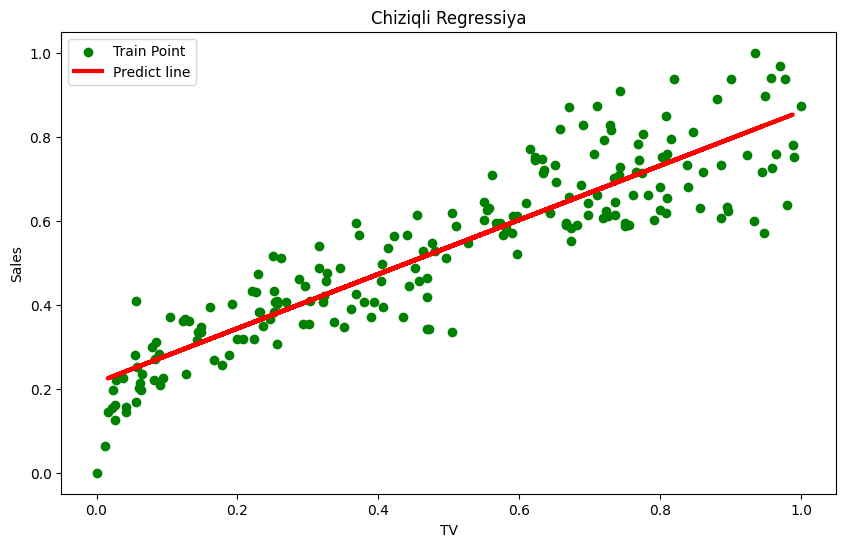

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['TV'],y=df['Sales'],label='Train Point',c='green')
plt.plot(X_test,predict,label='Predict line',c='red',linewidth=3)
plt.title("Chiziqli Regressiya")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [80]:
import pickle

with open("model_LR.pkl","wb") as file:
    pickle.dump(model,file)